In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Define k-values and groups

The <i>k_list</i> contains the k-values. A k-value indicate the number of nearest neighbours.

In [2]:
k_list = [1600]

In [3]:
group_list = ['SD', 'MP']

# Read data

Reads file to data frame with points to calculate nearest neighbours from.

In [4]:
points = pd.read_csv('punkter_vd2.csv', index_col='VD')
points.drop(['FID', 'LAN', 'LAN_NAMN', 'RVK', 'RVK_NAMN', 'LVK_NAMN', 'LND', 'LND_NAMN', 'LVK', 'KVK_NAMN', 'KOM', 'NAMN_KOM', 'KVK', 'KVK_NAMN', 'VD_NAMN', 'ORIG_FID'], axis=1, inplace=True)

points.rename(index=str, columns={"N": "North", "O": "East"}, inplace=True)

points.head()

,North,East
VD,,
1801301,6579820,674106
1801302,6579650,674012
1801303,6579330,674081
1801304,6579100,674153
1801305,6579340,674336


In [5]:
for k in k_list:
    points['radius_k'+str(k)] = 0
    points['total_k'+str(k)] = 0
    for group in group_list:
        points['group_'+group+'_k'+str(k)] = 0

points.head()

,North,East,radius_k1600,total_k1600,group_SD_k1600,group_MP_k1600
VD,,,,,,
1801301,6579820,674106,0,0,0,0
1801302,6579650,674012,0,0,0,0
1801303,6579330,674081,0,0,0,0
1801304,6579100,674153,0,0,0,0
1801305,6579340,674336,0,0,0,0


Reads file to data frame with populated locations.

In [6]:
popLocations0 = pd.read_csv('punkter_vd2.csv') #, index_col='VD'
popLocations0.drop(['FID', 'LAN', 'LAN_NAMN', 'RVK', 'RVK_NAMN', 'LVK_NAMN', 'LND', 'LND_NAMN', 'LVK', 'KVK_NAMN', 'KOM', 'KVK', 'KVK_NAMN', 'VD_NAMN', 'ORIG_FID'], axis=1, inplace=True)
popLocations0['NAMN_KOM'] = popLocations0['NAMN_KOM'].astype('category')

popLocations0.rename(index=str, columns={"N": "North", "O": "East"}, inplace=True)

popLocations0.head()

,NAMN_KOM,VD,North,East
0,Stockholm,1801301,6579820,674106
1,Stockholm,1801302,6579650,674012
2,Stockholm,1801303,6579330,674081
3,Stockholm,1801304,6579100,674153
4,Stockholm,1801305,6579340,674336


In [7]:
valnatt = pd.read_csv('valnatt.csv', delimiter=';') #, index_col='VD'
popLocations = pd.merge(popLocations0, valnatt, on='VD')
popLocations.set_index('VD', inplace=True)
popLocations.head()

,NAMN_KOM,North,East,Valdistrikt,M,C,L,KD,S,V,MP,SD,FI,OVR,OGEJ,BLANK,OG,ROSTER
VD,,,,,,,,,,,,,,,,,,
1801301,Stockholm,6579820,674106,Maria 1 Ivar Lo:s park mfl,235.0,124.0,126.0,38.0,260.0,196.0,127.0,85.0,10.0,15.0,1.0,4.0,5.0,1226.0
1801302,Stockholm,6579650,674012,Maria 2 Mariaberget V,185.0,112.0,92.0,45.0,220.0,164.0,135.0,71.0,7.0,14.0,NaN,5.0,6.0,1056.0
1801303,Stockholm,6579330,674081,Maria 3 Mariatorget V,193.0,96.0,97.0,37.0,259.0,199.0,129.0,84.0,11.0,16.0,NaN,6.0,11.0,1138.0
1801304,Stockholm,6579100,674153,Maria 4 Bergsgruvan,153.0,110.0,91.0,34.0,288.0,229.0,138.0,97.0,10.0,9.0,NaN,3.0,2.0,1164.0
1801305,Stockholm,6579340,674336,Maria 5 Mariatorget S,218.0,128.0,101.0,57.0,297.0,217.0,146.0,69.0,10.0,8.0,NaN,4.0,3.0,1258.0


In [8]:
popLocations.rename(index=str, columns={"ROSTER": "individuals"}, inplace=True)

popLocations['Distance'] = 0

popLocations.head()

,NAMN_KOM,North,East,Valdistrikt,M,C,L,KD,S,V,MP,SD,FI,OVR,OGEJ,BLANK,OG,individuals,Distance
VD,,,,,,,,,,,,,,,,,,,
1801301,Stockholm,6579820,674106,Maria 1 Ivar Lo:s park mfl,235.0,124.0,126.0,38.0,260.0,196.0,127.0,85.0,10.0,15.0,1.0,4.0,5.0,1226.0,0
1801302,Stockholm,6579650,674012,Maria 2 Mariaberget V,185.0,112.0,92.0,45.0,220.0,164.0,135.0,71.0,7.0,14.0,NaN,5.0,6.0,1056.0,0
1801303,Stockholm,6579330,674081,Maria 3 Mariatorget V,193.0,96.0,97.0,37.0,259.0,199.0,129.0,84.0,11.0,16.0,NaN,6.0,11.0,1138.0,0
1801304,Stockholm,6579100,674153,Maria 4 Bergsgruvan,153.0,110.0,91.0,34.0,288.0,229.0,138.0,97.0,10.0,9.0,NaN,3.0,2.0,1164.0,0
1801305,Stockholm,6579340,674336,Maria 5 Mariatorget S,218.0,128.0,101.0,57.0,297.0,217.0,146.0,69.0,10.0,8.0,NaN,4.0,3.0,1258.0,0


# The actual calculations

Steps through every point and calculate the number of individuals in every group among the k-nearest neighbours.

In [9]:
time0 = time.time()

for punktindex in range(len(popLocations)):
    North0 = points['North'].iloc[punktindex]
    East0 = points['East'].iloc[punktindex]
    
    popLocations['Distance'] = np.sqrt(np.power(North0-popLocations['North'], 2) + np.power(East0-popLocations['East'], 2)).astype('int')
    popLocations.sort_values('Distance', inplace=True)
    
    for k in k_list:
        population = 0
        index = 0
        while population < k:
            population += popLocations['individuals'].iloc[index]
            index += 1

        radius = popLocations['Distance'].iloc[index-1]

        points['radius_k'+str(k)].iat[punktindex] = radius
    
        selection = popLocations[popLocations['Distance'] <= radius]
        
        for group in group_list:
            points['group_'+group+'_k'+str(k)].iat[punktindex] = selection[group].sum()

        points['total_k'+str(k)].iat[punktindex] = selection['individuals'].sum()
    
print(time.time()-time0)

31.888417720794678


In [10]:
points['and_SD'] = points['group_SD_k1600']/points['total_k1600']
points['SD16'] = points['group_SD_k1600']/points['total_k1600']

points['and_SD'].astype('str')
points.head()

,North,East,radius_k1600,total_k1600,group_SD_k1600,group_MP_k1600,and_SD,SD16
VD,,,,,,,,
1801301,6579820,674106,194,2282,156,262,0.068361,0.068361
1801302,6579650,674012,194,2282,156,262,0.068361,0.068361
1801303,6579330,674081,241,2302,181,267,0.078627,0.078627
1801304,6579100,674153,183,2278,229,252,0.100527,0.100527
1801305,6579340,674336,183,2177,129,253,0.059256,0.059256


# Plotting the result

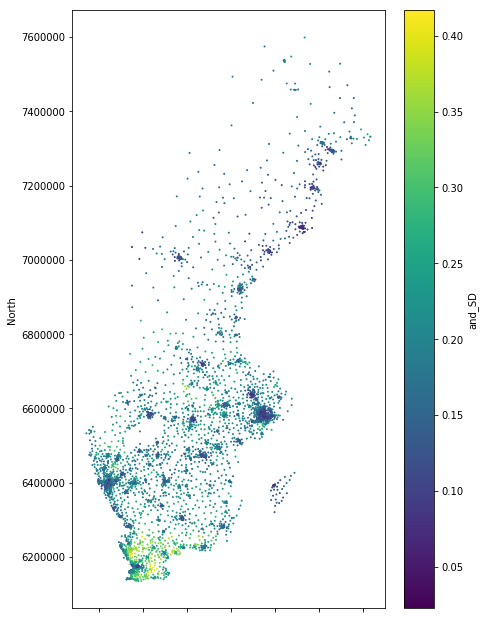

In [11]:
plt.rcParams['figure.figsize'] = [7, 11]

points.plot.scatter(x='East', y='North', c='and_SD', colormap='viridis', s=1);

# Saving the results as a CSV

In [12]:
points.to_csv('results.csv')